In [1]:
import sys
sys.path.insert(1, '/Users/Andrew/Documents/PhD/Scripts/Python/pygplates_rev12')
import pygplates
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpltools import style
from mpltools import layout
%matplotlib inline

/Users/Andrew/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/Andrew/anaconda/lib/python2.7/site-packages/mpltools/style/__init__.py:42: FutureWarning: 

    The style-sheet functionality in mpltools has been integrated into
    Matplotlib >= 1.4. This module will be removed in a future release.

    Note that style-sheets used by `matplotlib.style` use the standard
    Matplotlib rc-file syntax instead of the INI format used by `mpltools`.
    This mostly means un-quoting strings and changing '=' to ':'.


  """, FutureWarning)


In [2]:
rotation_model = pygplates.RotationModel('/Users/Andrew/Documents/PhD/Models/Rodinia_Models/Lis_model_amends/Merdith_Models/SWEAT_20151020/Rod-Gondw_Palaeozoic_20161212.rot')
topology_features = ['/Users/Andrew/Documents/PhD/Models/Rodinia_Models/Lis_model_amends/Merdith_Models/SWEAT_20151020/Convergence_20161207a.gpml',
                          '/Users/Andrew/Documents/PhD/Models/Rodinia_Models/Lis_model_amends/Merdith_Models/SWEAT_20151020/Divergence_20161207a.gpml',
                     '/Users/Andrew/Documents/PhD/Models/Rodinia_Models/Lis_model_amends/Merdith_Models/SWEAT_20151020/Transform_20161207a.gpml',     
                     '/Users/Andrew/Documents/PhD/Models/Rodinia_Models/Lis_model_amends/Merdith_Models/SWEAT_20151020/Topologies_20161207a.gpml']

#NB can ignore transform boundaries by ommiting their loading line of code above

In [3]:
# Resolve our topological plate polygons (and deforming networks) to the current 'time'.
# We generate both the resolved topology boundaries and the boundary sections between them.
num_time_steps = 1000
abs_latitude_points = []
latitude_points = []

for time in range(520, num_time_steps + 10,10):
    
    shared_boundary_sections = []
    abs_tmp_lat_points = []
    tmp_lat_points = []
    resolved_topologies = []
    pygplates.resolve_topologies(topology_features, rotation_model, resolved_topologies, time, shared_boundary_sections)

    for shared_boundary_section in shared_boundary_sections:
        #print shared_boundary_section
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_subduction_zone:
            #SZ.append(shared_boundary_section)
            geom = shared_boundary_section.get_topological_section_geometry()
            tmp1 = geom.to_tessellated(math.radians(0.1))
            tmp2 = geom.to_lat_lon_list()
            tmp2a = tmp1.to_lat_lon_list()
            tmp3 = np.asarray(tmp2a)
            tmp4 = tmp3[:,0]
            tmp5 = np.absolute(tmp4)
            abs_tmp_lat_points.extend(tmp5)
            tmp_lat_points.extend(tmp4)
                                  
    abs_latitude_points.append(abs_tmp_lat_points)
    latitude_points.append(tmp_lat_points)
    print "At time %dMa" % (time)

At time 520Ma
At time 530Ma
At time 540Ma
At time 550Ma
At time 560Ma
At time 570Ma
At time 580Ma
At time 590Ma
At time 600Ma
At time 610Ma
At time 620Ma
At time 630Ma
At time 640Ma
At time 650Ma
At time 660Ma
At time 670Ma
At time 680Ma
At time 690Ma
At time 700Ma
At time 710Ma
At time 720Ma
At time 730Ma
At time 740Ma
At time 750Ma
At time 760Ma
At time 770Ma
At time 780Ma
At time 790Ma
At time 800Ma
At time 810Ma
At time 820Ma
At time 830Ma
At time 840Ma
At time 850Ma
At time 860Ma
At time 870Ma
At time 880Ma
At time 890Ma
At time 900Ma
At time 910Ma
At time 920Ma
At time 930Ma
At time 940Ma
At time 950Ma
At time 960Ma
At time 970Ma
At time 980Ma
At time 990Ma
At time 1000Ma


In [4]:
times = range(520, num_time_steps + 10,10)
abs_lats = abs_latitude_points
lats = latitude_points

#plotting params
width=9
axes_title_fontsize = 40
tick_fontsize = 20
title_fontsize = 40
major_ticks = np.arange(-90, 91, 30) 

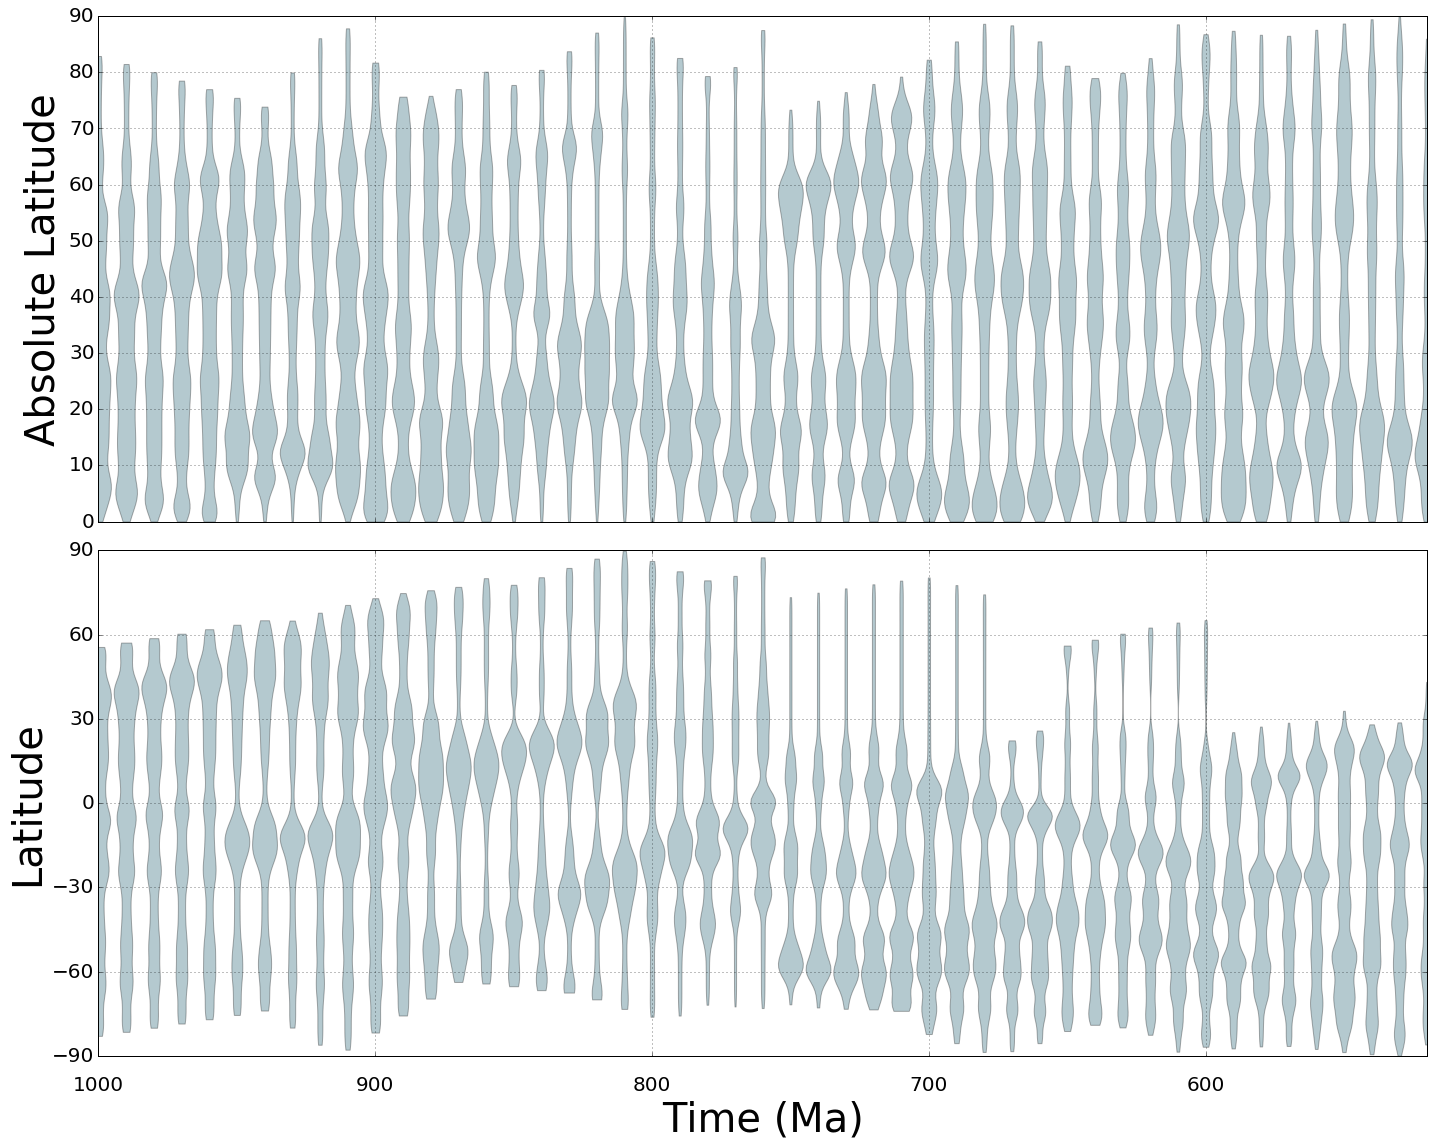

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,16),facecolor='w', edgecolor='k')

vp_abs = axes[0].violinplot(abs_lats,times,widths=width,bw_method=0.1,showextrema=False)
axes[0].set_xlim(1000,520)
axes[0].set_ylim(0,90)
axes[0].set_ylabel('Absolute Latitude', fontsize=axes_title_fontsize)
axes[0].tick_params(axis='y', labelsize=tick_fontsize)
axes[0].set_xticklabels([])
axes[0].grid(True)
vp = axes[1].violinplot(lats,times,widths=width,bw_method=0.1,showextrema=False)
axes[1].set_xlim(1000,520)
axes[1].set_ylim(-90,90)
axes[1].set_ylabel('Latitude', fontsize=axes_title_fontsize)
axes[1].set_xlabel('Time (Ma)', fontsize=axes_title_fontsize)
axes[1].tick_params(axis='y', labelsize=tick_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize, pad=20)
axes[1].set_yticks(major_ticks)
axes[1].grid(True)

#set colouring
for pc in vp['bodies']:
    pc.set_facecolor('#084c61')
    pc.set_edgecolor('black')

for pc in vp_abs['bodies']:
    pc.set_facecolor('#084c61')
    pc.set_edgecolor('black')
    
plt.tight_layout()
plt.savefig('Subduction_palaeolatitude.svg', bbox_inches='tight')